# Example: Reading 2D tabular data (DataFrame) 

This example illustrates the how to read 2D tabular data using the HydroMT [DataCatalog](../_generated/hydromt.data_catalog.DataCatalog.rst) with the `csv` driver.

In [1]:
from hydromt import DataCatalog

data_catalog = DataCatalog("data/tabular_data_catalog.yml")

## Pandas driver 

### time series data

To read 2D tabular data from a comma-separated file (csv) and parse it into a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) we use the [pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Any *driver_kwargs* in the data catalog are passed to this method, e.g., parsing dates in the "time" colum and setting this as the index.

This works similarly for excel tables, but based on the [pandas.read_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel) method. 

For demonstration we use a dummy example timeseries data in csv. 

In [2]:
# inspect data source entry in data catalog yaml file
data_catalog.get_source("example_csv_data")

DataFrameSource(name='example_csv_data', uri='example_csv_data.csv', data_adapter=DataFrameAdapter(unit_add={}, unit_mult={}, rename={}), driver=PandasDriver(filesystem=<fsspec.implementations.local.LocalFileSystem object at 0x77c6b4dbb040>, options={'parse_dates': True, 'index_col': 'time'}), uri_resolver=ConventionResolver(filesystem=<fsspec.implementations.local.LocalFileSystem object at 0x77c6b4dbb040>, options={}), root='data', version=None, provider=None, metadata=SourceMetadata(crs=None, unit=None, extent={}, nodata=None, attrs={}, category=None))

We can load any 2D tabular data using [DataCatalog.get_dataframe()](../_generated/hydromt.data_catalog.DataCatalog.get_dataframe.rst). Note that if we don't provide any arguments it returns the full dataframe.

In [3]:
df = data_catalog.get_dataframe("example_csv_data")
df.head()

object: PandasDriver does not use kwarg metadata with value crs=None unit=None extent={} nodata=None attrs={} category=None.


,col1,col2
time,,
2016-01-01,0.590860,0.591380
2016-01-02,0.565552,0.571342
2016-01-03,0.538679,0.549770
2016-01-04,0.511894,0.526932
2016-01-05,0.483989,0.502907


The data can be visualized with the [.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) pandas method. 

<Axes: xlabel='time'>

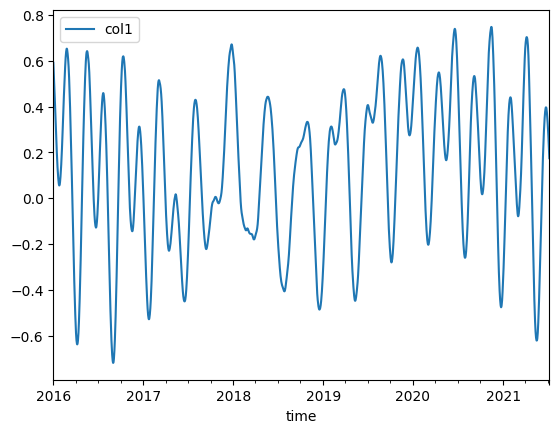

In [4]:
df.plot(y="col1")

### reclassification table

Another typical usecase for tabular data are reclassification tables to reclassify e.g. land use data to manning roughness. An example of this data is shown in the cells below. Note tha the values are not validated and likely too high!

In [5]:
# read both the vito_reclass and artifact_data data catalogs
data_catalog = DataCatalog(["data/vito_reclass.yml", "artifact_data"])
data_catalog.get_source("vito_reclass")

DataFrameSource(name='vito_reclass', uri='vito_reclass.csv', data_adapter=DataFrameAdapter(unit_add={}, unit_mult={}, rename={}), driver=PandasDriver(filesystem=<fsspec.implementations.local.LocalFileSystem object at 0x77c6b4dbb040>, options={'index_col': 0}), uri_resolver=ConventionResolver(filesystem=<fsspec.implementations.local.LocalFileSystem object at 0x77c6b4dbb040>, options={}), root='data', version=None, provider=None, metadata=SourceMetadata(crs=None, unit=None, extent={}, nodata=None, attrs={}, category=None, notes='reclass table for manning values'))

In [6]:
df = data_catalog.get_dataframe("vito_reclass")
df.head()

object: PandasDriver does not use kwarg metadata with value crs=None unit=None extent={} nodata=None attrs={} category=None notes='reclass table for manning values'.


,description,landuse,manning
vito,,,
0,Unknown,0,-999.000
20,Shrubs,20,0.500
30,Herbaceous vegetation,30,0.150
40,Cultivated and managed vegetation/agriculture ...,40,0.200
50,Urban / built up,50,0.011


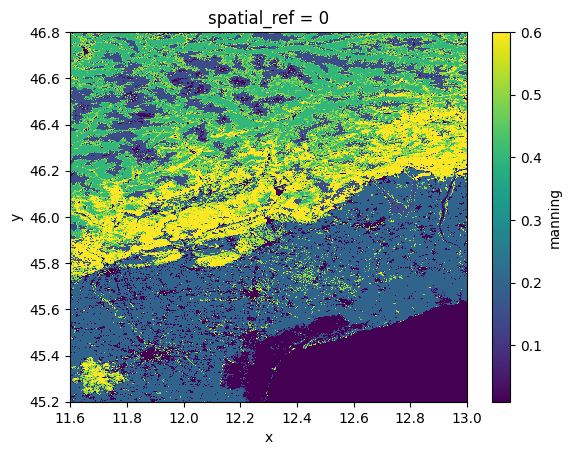

In [7]:
da_lulc = data_catalog.get_rasterdataset("vito_2015")
da_man = da_lulc.raster.reclassify(df[["manning"]])
da_man["manning"].plot.imshow()